# Сборный проект: анализ успешности игр

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Нам предоставлены данные до 2016 года. Нужно спрогнозировать кампанию на 2017-й.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных

- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales —* продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales —* продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации *ESRB* (англ. *Entertainment Software Rating Board).* Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Изучим общую информацию о датафрейме.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Предобработка данных

In [4]:
# Комментарий ревьюера 0
temp = df.copy() # создаем копию датасета до преобразования
len(temp)

16715

Заменим названия столбцов, приведя их к нижнему регистру.

In [5]:
# df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Проверим датафрейм на наличие полных дубликатов. При наличии - удаляем.

In [6]:
df.duplicated().sum()

0

Проверим датафрейм на наличие неявных дубликатов.

In [7]:
# Для начала приведем все значения столбца name к одному (нижнему) регистру
df['name'] = df['name'].str.lower()
df.duplicated().sum()

0

In [8]:
# Проверим столбец platform на наличие неявных дубликатов, а также выясним есть ли необходимость приведения значений к одному регистру
df['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [9]:
# Проверим столбец genre на наличие неявных дубликатов, а также выясним есть ли необходимость приведения значений к одному регистру
df['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

In [10]:
# Выполним проверку на наличие в столбце name неявных дубликатов
df[['name', 'platform', 'year_of_release']].duplicated().sum()

2

In [11]:
# Выведем эти строки
df[df[['name', 'platform', 'year_of_release']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,madden nfl 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [12]:
# Рассмотрим строки, дубликатами которых является строки представленные выше, и сами строки-дубликаты
#df.loc[((df['name'].isna()) & (df['platform'] == 'GEN') & (df['year_of_release'] == 1993.0)) | ((df['name'] == 'madden nfl 13') & (df['platform'] == 'PS3') & (df['year_of_release'] == 2012.0))]

df[df[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,madden nfl 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [13]:
# Число продаж в Европе для разных строк - два разных значения. Чтобы не потерять их при удалении дубликатов - суммируем их и запишем в переменную
madden_nfl_13_eu_sales = df.loc[(df['name'] == 'madden nfl 13') 
                                & (df['platform'] == 'PS3') 
                                & (df['year_of_release'] == 2012.0)
                                , 'eu_sales'].sum()

# Аналогично, чтобы не потерять количестов продаж в Японии, суммируем их и сохраним в переменную
unknown_jp_sales = df.loc[(df['name'].isna()) 
                          & (df['platform'] == 'GEN') 
                          & (df['year_of_release'] == 1993.0)
                         , 'jp_sales'].sum()

# Удаление дубликатов
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

# Замена значений на суммарные значения строк дубликатов в конкретных столбцах
df.loc[(df['name'] == 'madden nfl 13') & (df['platform'] == 'PS3') & (df['year_of_release'] == 2012.0), 'eu_sales'] = madden_nfl_13_eu_sales
df.loc[(df['name'].isna()) & (df['platform'] == 'GEN') & (df['year_of_release'] == 1993.0), 'jp_sales'] = unknown_jp_sales

# Проверка
df.loc[((df['name'].isna()) & (df['platform'] == 'GEN') & (df['year_of_release'] == 1993.0)) 
       | ((df['name'] == 'madden nfl 13') & (df['platform'] == 'PS3') & (df['year_of_release'] == 2012.0))] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,PS3,2012.0,Sports,2.11,0.23,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.03,0.08,NaN,NaN,NaN


In [14]:
# Проверим столбец rating на наличие неявных дубликатов
df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Согласно https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board
- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults"):
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года.
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.
- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.
- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу:
- «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M». Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант

Соответственно, E10+ и K-A - это одно и то же. Заменим встречающиеся значения K-A на E10+.

In [15]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E10+'

# Проверка
df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'M', 'RP', 'T', nan], dtype=object)

In [16]:
# Выполним итоговую проверку на наличие в столбце name неявных дубликатов
df[['name', 'platform', 'year_of_release']].duplicated().sum()

0

Опираясь на полученную общую информацию о датафрейме, можно сказать, что данные не всех столбцов отвечают соответсвующему им типу. Это касается следующих столбцов:

- year_of_release (изменить тип данных float64 на int64)	
- user_score (изменить тип данных object на float64)

Исправим это.

In [17]:
# Изменяем тип данных в столбце user_score
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
# В столбце с оценкой пользователей значения 'tbd' - To Be Determined, были заменены на NaN

# Проверка
df['user_score'].dtypes

dtype('float64')

In [18]:
# Проверка на наличие пропусков в столбцах
df.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
dtype: int64

Мы можем заметить наличие пропусков в следующих столбцах:

- name
- year_of_release
- genre
- critic_score	
- user_score	
- rating

In [19]:
# Количество строк с пропусками хотя бы в одном из столбцов name, year_of_release, genre и rating
count_of_skip = df.loc[(df['name'].isna()) | (df['year_of_release'].isna()) | (df['genre'].isna()) | (df['rating'].isna())].shape
count_of_skip

(6946, 11)

Пропуски в столбцах **name, year_of_release, genre, и rating** полностью случайны. Причинами таких пропусков могут стать попросту забытые данные или предшествующая заполнению нехватка информации об игре: забыли заполнить название игры, нет информации о годе выпуска, аналогичная ситуация с жанром, рейтинг от организации ESRB еще не был присвоен. Заполнению они не подлежат, так как мы никоим образом не можем угадать пропущенное название игры, жанр, год выпуска и рейтинг (хотя год выпуска и можно было бы заполнить медианным значением, это было не совсем верно и логично, да и анализировать мы будем лишь конркетный период). Для анализа в данном случае необходима конкретика, а если ее никак нельзя добиться и нет возможности получить корректные данные, то откажемся от заполнения пропусков и оставим все как есть, так как при удалении строк с пропусками в перечисленных столбцах будет потеряна значительная часть данных.

In [20]:
# Проверим какая доля данных будет потеряна в случае удаления строк с пропусками в столбцах name, year_of_release, genre и rating
count_of_skip[0] / len(temp)

0.4155548908166318

Таким образом, будет удалено более 41% данных. Это недопустимо.

Однако в столбце **name** всего один пропуск. Его можно удалить, так как одна строка составляет ничтожно малый процент от всего датафрейма и ни на что не влияет.

In [21]:
df[df['name'].isna()].isna().sum()

name               1
platform           0
year_of_release    0
genre              1
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       1
user_score         1
rating             1
dtype: int64

Можем заметить, что в строках с пропусками в столбце name есть пропуски и по другим колонкам. Это может свидетельствовать о том, что игра еще находится в процессе разработки и релиз еще не состоялся. 

In [22]:
# Удаление строк с пропусками в столбце name
df = df[~df['name'].isna()]

# Проверка
df['name'].isna().sum()

0

Обратим внимание на то, что строки с пропусками в столбце year_of_release также составляют малую часть от общего объема данных. Рассмотрим их.

In [23]:
# Какую долю составляют строки с пропусками в year_of_release от общего объема данных.
269 / len(temp)

0.01609332934489979

Всего 1,6% составляют строки с пропусками в year_of_release от общего объема данных. Следовательно, их можно удалить.

In [24]:
df[df['year_of_release'].isna()].isna().sum()

name                 0
platform             0
year_of_release    269
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       115
user_score         142
rating              88
dtype: int64

Заметим, что в строках с пропусками в столбце year_of_release есть пропуски и по другим колонкам. 

In [25]:
# Удаление строк с пропусками в столбце year_of_release
#df = df[~df['year_of_release'].isna()]
df = df.dropna(subset=['year_of_release'])

# Проверка
df['year_of_release'].isna().sum()

0

Рассмотрим пропуски в столбце rating. Данные по этому столбцу могут быть пропущены по причине того, что игре еще не был присвоен определенные рейтинг. Заменим пропуски в этом столбцу на 'tbd' - To Be Determined

In [26]:
df['rating'] = df['rating'].fillna('tbd')

# Проверка
df['rating'].unique()

array(['E', 'tbd', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [27]:
# Проверка на количство строк датафрейма после удаления пропусков
df.shape

(16443, 11)

In [28]:
# Комментарий ревьюера 0
# Проверим сколько удалено строк датасета
a, b = len(temp), len(df)
print(a, b, round((a-b)/a*100, 2))

16715 16443 1.63


В столбцах **critic_score, user_score** пропуски также случайны. Причины пропусков идентичны предыдущим столбцам: забыли внести данные об оценках или же игра в целом еще могла не получить никаких оценок (tbd). Так как пропусков достаточно много и они составляют значительную часть данных, то заполнение их медианным значением может привести к некорректным результатам в дальнейшем.

In [29]:
# Количество строк с пропусками хотя бы в одном из столбцов critic_score, user_score
count_of_skip = df.loc[(df['critic_score'].isna()) | (df['user_score'].isna()) ].shape
count_of_skip

(9550, 11)

In [30]:
# Проверим какую долю данных составляют строки с пропусками в столбцах critic_score, user_score
count_of_skip[0] / len(temp)

0.571343104995513

Слишком большую долю данных составляют строки с пропусками в столбцах critic_score, user_score, чтобы заполнять эти пропуски медианными значениями.

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [31]:
# df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df['total_sales'] = df.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,tbd,40.24
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,tbd,31.38


In [32]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100, 2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' beyblade burst' ' fire emblem fates' " frozen: olaf's quest" ...
 'zwei!!' 'zyuden sentai kyoryuger: game de gaburincho!!'
 '¡shin chan flipa en colores!']


In [33]:
# Посмотрим, что получилось в итоге
temp = df.copy() 
list_c = df.columns[~df.columns.isin(['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'])]
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' beyblade burst' ' fire emblem fates' " frozen: olaf's quest" ...
 'zwei!!' 'zyuden sentai kyoryuger: game de gaburincho!!'
 '¡shin chan flipa en colores!']


В результате предобработки данных была произведена проверка на наличие полных, явных и неявных дубликатов, устранены пропуски путем удаления строк со значениями NaN в столбцах name и year_of_release, названия столбцов были приведены к нужному (нижнему)  регистру и изменен тип данных в тех столбцах, где это было необходимо. По итогу мы получили датафрейм с более корретными данными. Однако все еще остались пропуски в столбцах critic_score и user_score, которые нельзя запонить в связи с тем, что их процентное содержание в общем объеме датафрейма значительно, что может иметь последствия в виде некорректных результатов анализа в дальнейшем.

## Исследовательский анализ

### Количество релизов игр в разные года 

Посмотрим, сколько игр выпускалось в разные годы. 

In [34]:
df['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     652
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

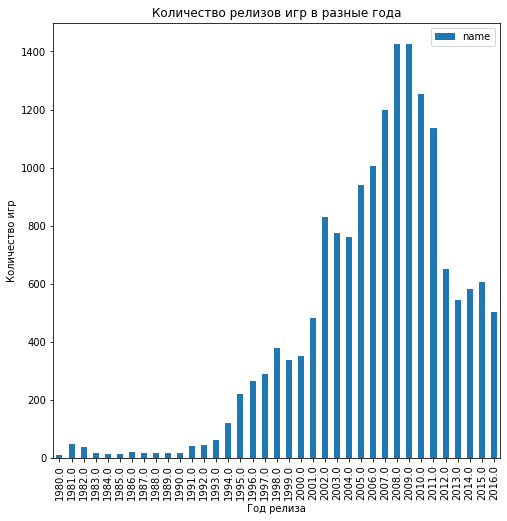

In [35]:
df.groupby('year_of_release').agg({'name': 'count'}).plot.bar(figsize=(8, 8))

plt.title('Количество релизов игр в разные года')
plt.xlabel('Год релиза')
plt.ylabel('Количество игр')
plt.show()

Наибольшее количество игр было выпущено в период с 2008 по 2009 года.

### Тенденция изменения продаж по платформам

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Рассмотрим, за какой характерный срок появляются новые и исчезают старые платформы.

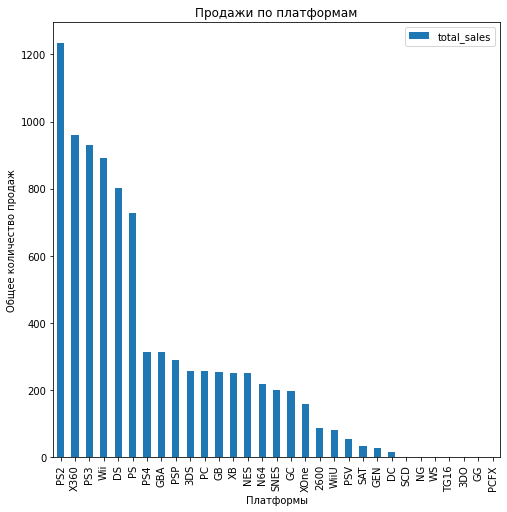

In [36]:
# Выбор платформ с наибольшими суммарными продажами
df_top_of_platform = df.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False)
df_top_of_platform.plot.bar(figsize=(8, 8))

plt.title('Продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Общее количество продаж')
plt.show()

In [37]:
# Возьмем первые 5 платформ с наибольшими суммарными продажами
df_top_of_platform = df_top_of_platform.reset_index().loc[:4] 
df_top_of_platform

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


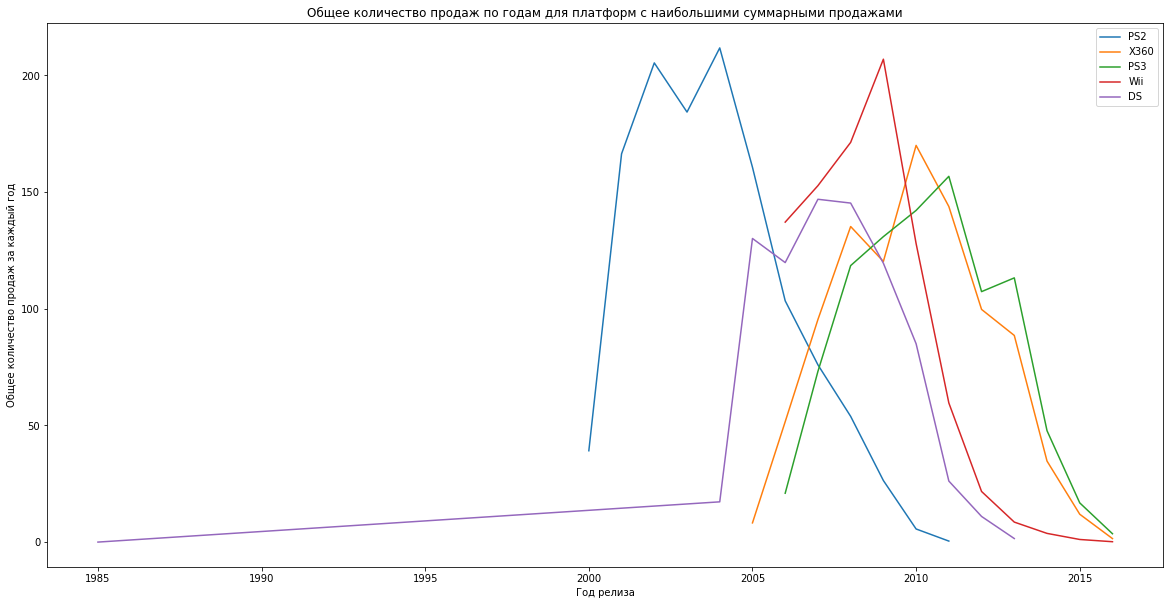

In [38]:
# Построим распределение по годам для выбранных платформ с наибольшими суммарными продажами
fig, ax = plt.subplots(figsize=(20, 10))

for platform in df_top_of_platform['platform'].unique():
    df_platform = df[df['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    df_platform.plot(ax=ax)
    
plt.legend(df_top_of_platform['platform'].unique())
plt.title('Общее количество продаж по годам для платформ с наибольшими суммарными продажами')
plt.xlabel('Год релиза')
plt.ylabel('Общее количество продаж за каждый год')
plt.show()

На графике мы можем заметить наличие артефакта у платформы DS. В 1985 году этой платформы еще не существовало. Устраним ошибку.

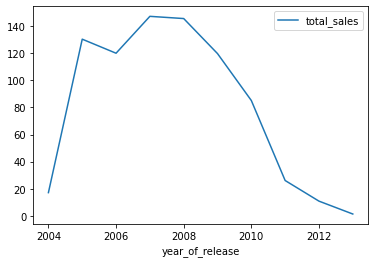

In [39]:
df = df.drop(df[(df['platform'] == 'DS') & (df['year_of_release'] == 1985)].index)

# Проверка
df[df['platform'] == 'DS'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot()
plt.show()

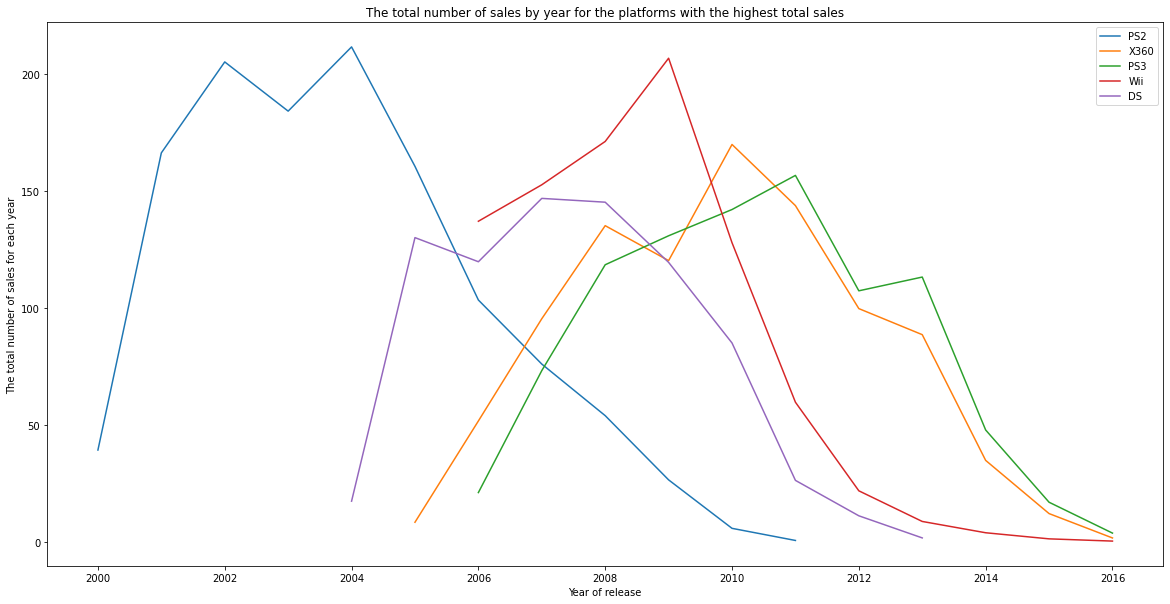

In [40]:
# Построим распределение по годам для выбранных платформ с наибольшими суммарными продажами
fig, ax = plt.subplots(figsize=(20, 10))

for platform in df_top_of_platform['platform'].unique():
    df_platform = df[df['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    df_platform.plot(ax=ax)
    
plt.legend(df_top_of_platform['platform'].unique())
plt.title('The total number of sales by year for the platforms with the highest total sales')
plt.xlabel('Year of release')
plt.ylabel('The total number of sales for each year')
plt.show()

In [41]:
# Определим год, на который приходится пик прибыльности продаж на рассматриваемых платформах
for platform in df_top_of_platform['platform'].unique():
    d = df[df['platform'] == platform].groupby('year_of_release').agg({'total_sales': 'sum'}).reset_index(drop=False)
    print(f"Для платформы {platform} пик прибыльности составляет {d['total_sales'].max()} в \n{d.loc[d['total_sales'] == d['total_sales'].max(), 'year_of_release']} году")

Для платформы PS2 пик прибыльности составляет 211.80999999999992 в 
4    2004.0
Name: year_of_release, dtype: float64 году
Для платформы X360 пик прибыльности составляет 170.02999999999992 в 
5    2010.0
Name: year_of_release, dtype: float64 году
Для платформы PS3 пик прибыльности составляет 156.7800000000001 в 
5    2011.0
Name: year_of_release, dtype: float64 году
Для платформы Wii пик прибыльности составляет 206.97000000000028 в 
3    2009.0
Name: year_of_release, dtype: float64 году
Для платформы DS пик прибыльности составляет 146.9400000000003 в 
3    2007.0
Name: year_of_release, dtype: float64 году


In [42]:
# Комментарий ревьюера
# Определим срок жизни платформы
temp = df.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

Опираясь на полученный график можно сделать вывод о том, что платформы, лидирующие по суммарными продажами, то есть наиболее успешные, существуют в среднем течение 7 лет, а пик их прибыльности в среднем приходится на 4-ый год их существования. Поэтому при прогнозировании успешной кампании на 2017 год стоит взять в расчет этот фактор и проводить анализ данных за последние четыре года, чтобы этот пик пришелся на 2017 год. В соответствии со всем сказанным, **актуальный период - это период с 2014 года по 2016 год**.

### Актуальный период

**Актуальный период - это период с 2014 года по 2016 год**. Создадим новый датафрейм путем отсечения данных не входящих в актуальный период и продолжим нашу  работу сним.

In [43]:
df_actual = df.query('2014 <= year_of_release <= 2016').reset_index(drop=True)
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,call of duty: black ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,tbd,14.63
1,grand theft auto v,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,pokemon omega ruby/pokemon alpha sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,tbd,11.68
3,fifa 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,star wars battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,tbd,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1684,strawberry nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,tbd,0.01
1685,aiyoku no eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,tbd,0.01
1686,samurai warriors: sanada maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,tbd,0.01
1687,haitaka no psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,tbd,0.01


#### Тенденция продаж в актуальный период

Посмотрим, какие платформы лидируют по продажам: растут или падают. Выберем несколько потенциально прибыльных платформ.

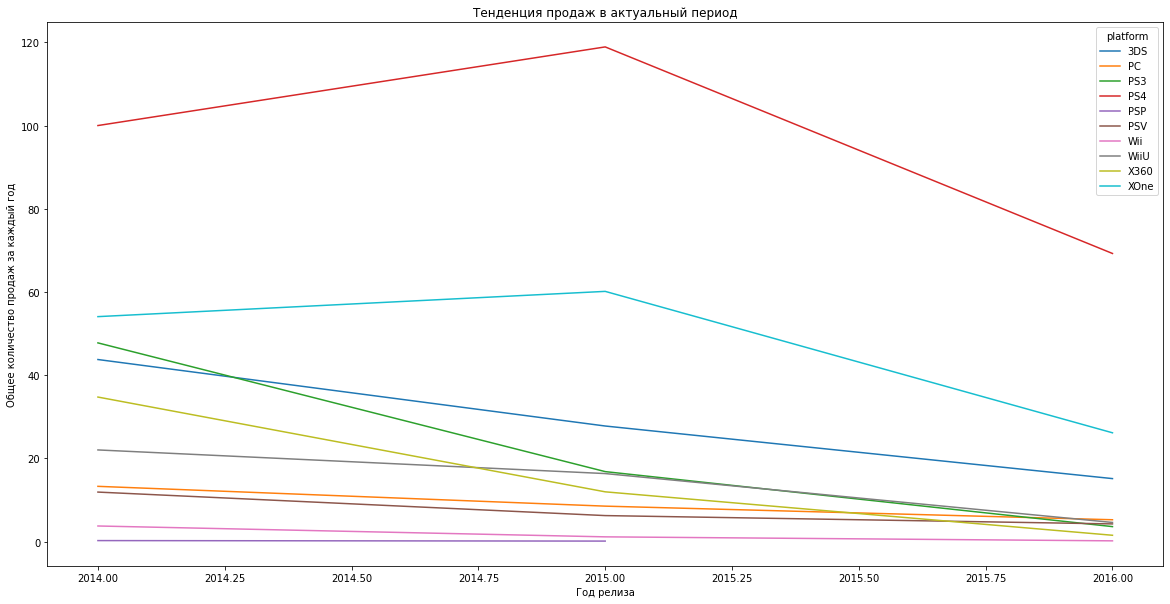

In [44]:
(df_actual.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .plot(figsize=(20, 10))
)

plt.title('Тенденция продаж в актуальный период')
plt.xlabel('Год релиза')
plt.ylabel('Общее количество продаж за каждый год')
plt.show()

Лидирующими по продажам платформамами являются PS4, XOne. Несмотря на падение количества продаж на этих платформах после начала 2015 года, они всё равно преобладают над другими. Платформы PS3 и X360 в начале 2014 года занимали на рынке 3 и 5 места соответственно, однако затем началось резкое падение количества продаж и уже в начале 2015 они оказались на позиции ниже платформ WiiU и 3DS, относительно которых можно сказать следующее: с начала 2014 года продажи стабильно падают, и в случае с WiiU стремятся к 0. PC, PSV, Wii И PSP гораздо более стабильны - итак небольшое количество продаж сопровождается еле заметным падением - изменения настолько незначительны, что при визуализации выглядят как прямая, расположенная под нулевым углом к горизонтальной оси. Однако важно сказать, что продажи всех рассматриваемых платформ на начало 2016 года, кроме PS4 и XOne, очень близки к нулю, в связи с чем не могут сопутствовать цели нашего проекта.

Таким образом, **к потенциально прибыльным платформам можно отнести PS4, XOne**, так как в их случае прослеживается хоть какая-то положительная динамика.

#### Глобальные продажи игр по платформам.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

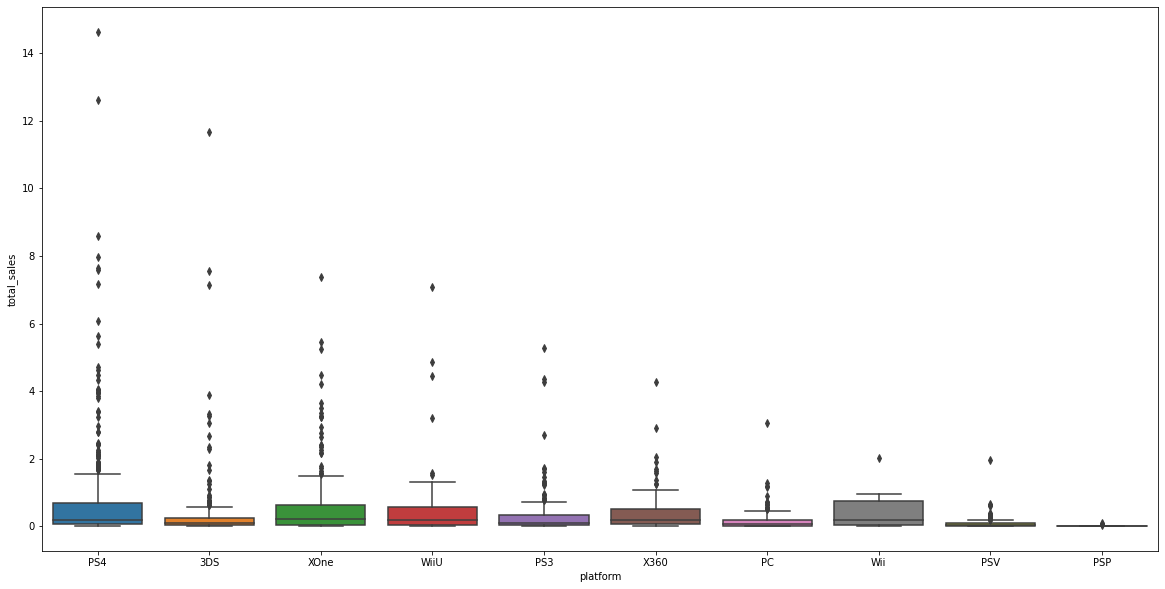

In [45]:
fig = plt.subplots(figsize=(20, 10))

# Строим "ящики с усами" для каждой платформы
sns.boxplot(x='platform', y='total_sales', data=df_actual[['platform', 'total_sales']])
plt.show()

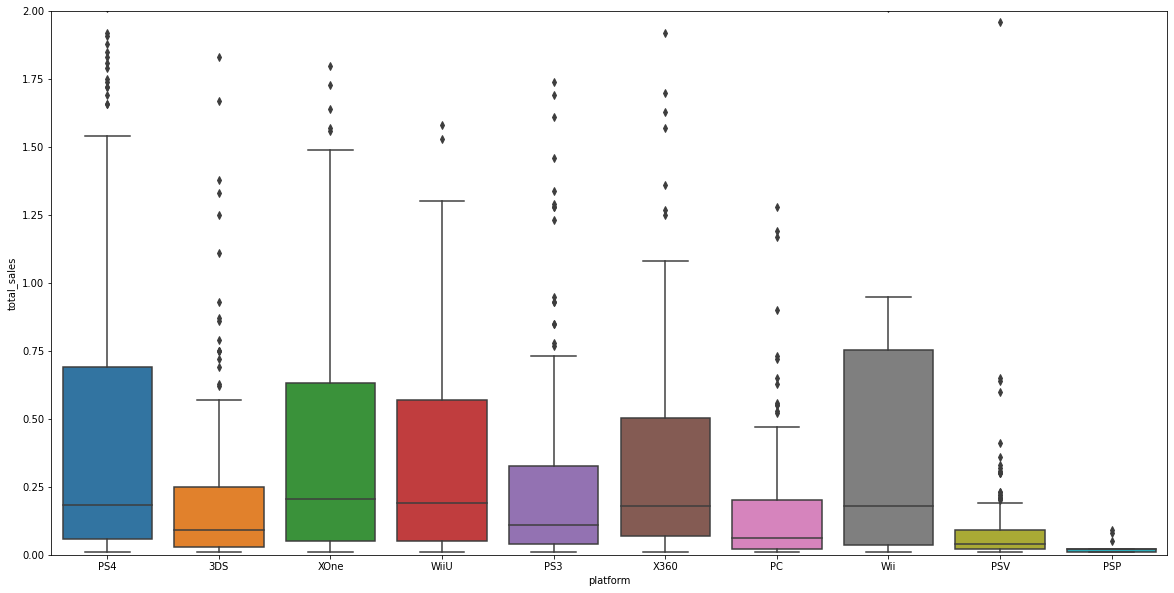

In [46]:
fig = plt.subplots(figsize=(20, 10))

# Строим "ящики с усами" для каждой платформы масштабированный
sns.boxplot(x='platform', y='total_sales', data=df_actual[['platform', 'total_sales']])
plt.ylim(0, 2)
plt.show()

In [47]:
for platform in df_actual['platform'].unique():
    print(f"Описание для платформы {platform}:\n {df_actual.loc[df_actual['platform'] == platform, 'total_sales'].describe()}\n{'-'*25}")

Описание для платформы PS4:
 count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: total_sales, dtype: float64
-------------------------
Описание для платформы 3DS:
 count    212.000000
mean       0.408868
std        1.188368
min        0.010000
25%        0.030000
50%        0.090000
75%        0.250000
max       11.680000
Name: total_sales, dtype: float64
-------------------------
Описание для платформы XOne:
 count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: total_sales, dtype: float64
-------------------------
Описание для платформы WiiU:
 count    73.000000
mean      0.588767
std       1.161467
min       0.010000
25%       0.050000
50%       0.190000
75%       0.570000
max       7.090000
Name: total_sales, dtype: float64
-------------------------
Описание д

Посмотрев на диаграммы размаха, можно сказать, что лидирует по среднему количеству продаж платформа XOne - 0.2 миллиона проданных копий. От нее не отстают платформы PS4, WiiU, X360, а также Wii. Также мы видим некотрое количество выбросов. Это наверняка игры, обладающие большой популярностью и относящиеся к бестселлерам. Чаще всего ими становятся игры, относящиеся к платформам PS4, 3DS и XOne.

###  Влияние на продажи отзывов пользователей и критиков

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

#### Влияние на продажи отзывов пользователей

Платформа PS4



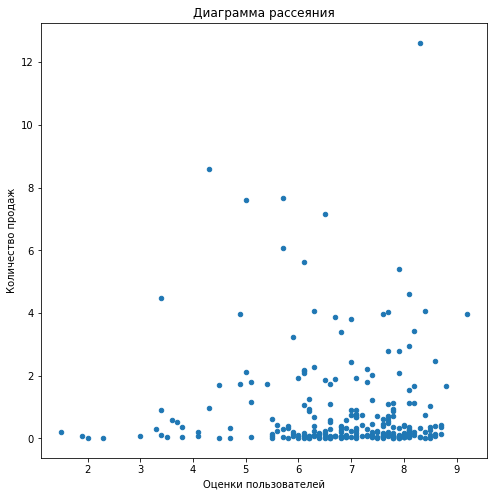



Коэффициент Пирсона: -0.09643975563552805

 ----------------------------------------------------------------------------------------------------
Платформа XOne



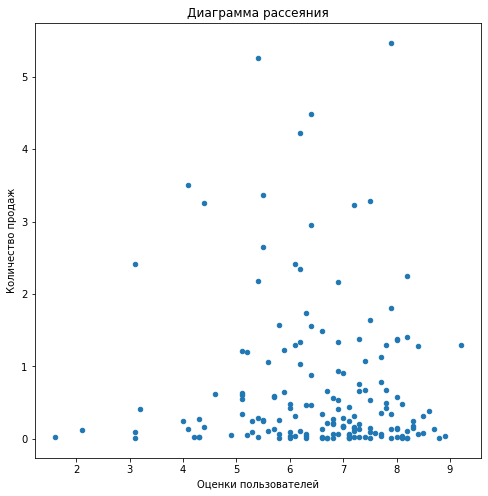



Коэффициент Пирсона: 0.06503039189627331

 ----------------------------------------------------------------------------------------------------
Платформа 3DS



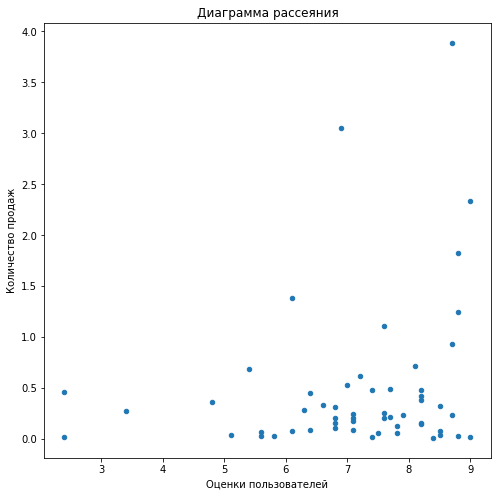



Коэффициент Пирсона: 0.02114521991842044

 ----------------------------------------------------------------------------------------------------
Платформа PS3



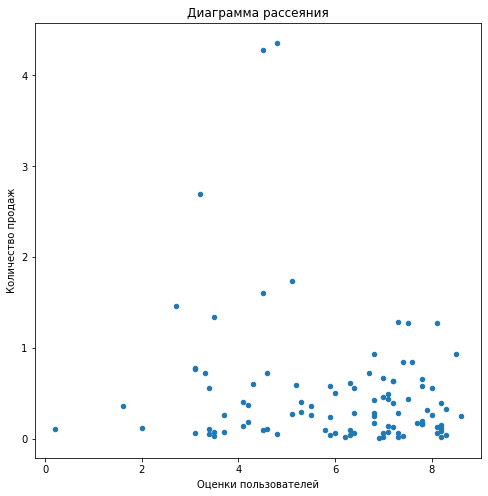



Коэффициент Пирсона: 0.20231675569577326

 ----------------------------------------------------------------------------------------------------
Платформа X360



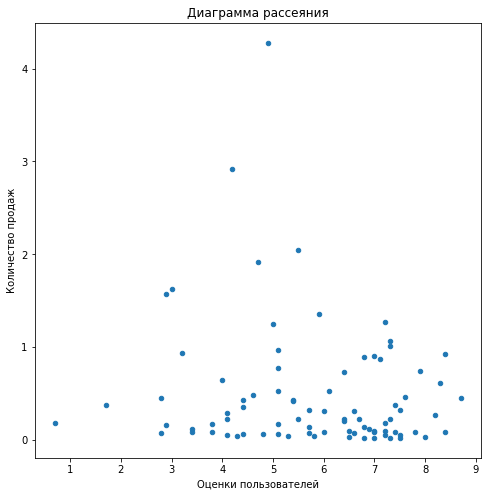



Коэффициент Пирсона: 0.059177706694179336

 ----------------------------------------------------------------------------------------------------


In [48]:
# Выберем 5 платформ с наибольшим количеством продаж 
some_platforms = df_actual.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False)
some_platforms = some_platforms.reset_index().loc[:4]

# Построим для них диаграммы рассеяния и посчитаем корреляцию между оценкаи пользователей и продажами.
for platform in some_platforms['platform'].unique():
    print(f"Платформа {platform}\n")
    
    df_platform = df_actual[df_actual['platform'] == platform]
    df_platform.plot(kind='scatter', x='user_score', y='total_sales', figsize=(8, 8))
    plt.title('Диаграмма рассеяния')
    plt.xlabel('Оценки пользователей')
    plt.ylabel('Количество продаж')
    plt.show()
    print('\n')
    
    print(f"Коэффициент Пирсона: {df_platform['total_sales'].corr(df['user_score'])}")
    
    print('\n', '-'*100)


#### Влияние на продажи отзывов критиков

Платформа PS4



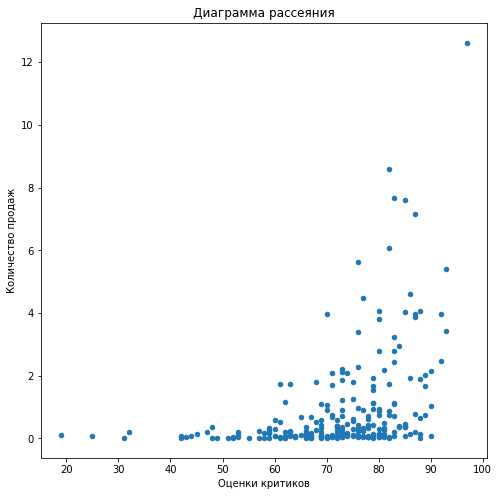



Коэффициент Пирсона: 0.08595438796235928

 ----------------------------------------------------------------------------------------------------
Платформа XOne



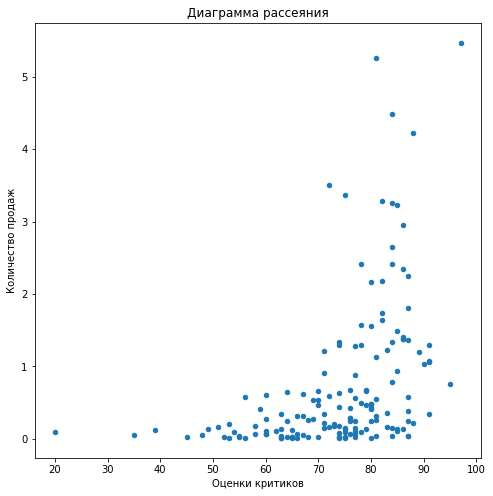



Коэффициент Пирсона: 0.2968536331310875

 ----------------------------------------------------------------------------------------------------
Платформа 3DS



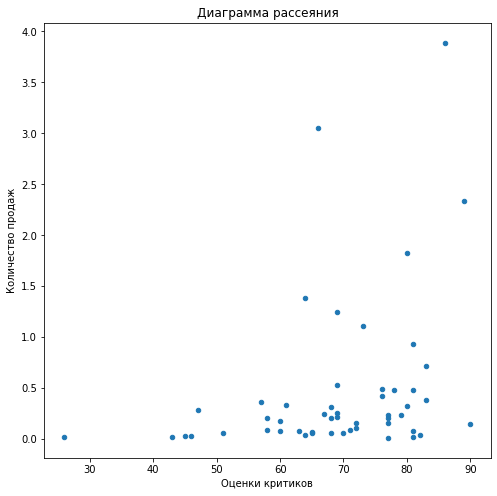



Коэффициент Пирсона: 0.01849336160412645

 ----------------------------------------------------------------------------------------------------
Платформа PS3



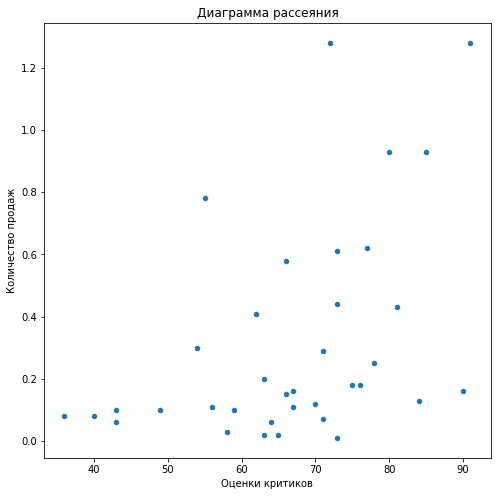



Коэффициент Пирсона: 0.2751543884778794

 ----------------------------------------------------------------------------------------------------
Платформа X360



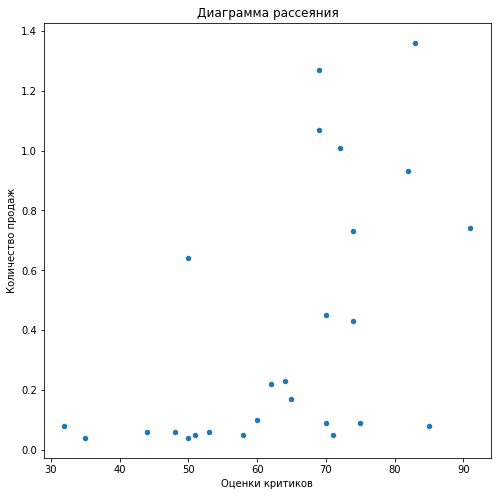



Коэффициент Пирсона: 0.16515927903931177

 ----------------------------------------------------------------------------------------------------


In [49]:
# Выберем 5 платформ с наибольшим количеством продаж 
some_platforms = df_actual.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False)
some_platforms = some_platforms.reset_index().loc[:4]

# Построим для них диаграммы рассеяния и посчитаем корреляцию между оценкаи критиков и продажами.
for platform in some_platforms['platform'].unique():
    print(f"Платформа {platform}\n")
    
    df_platform = df_actual[df_actual['platform'] == platform]
    df_platform.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(8, 8))
    plt.title('Диаграмма рассеяния')
    plt.xlabel('Оценки критиков')
    plt.ylabel('Количество продаж')
    plt.show()
    print('\n')
    
    print(f"Коэффициент Пирсона: {df_platform['total_sales'].corr(df['critic_score'])}")
    
    print('\n', '-'*100)


Таким образом, на продажи игр внутри платформы отзывы критиков и отзывы пользователей оказывают очень слабое влияние.

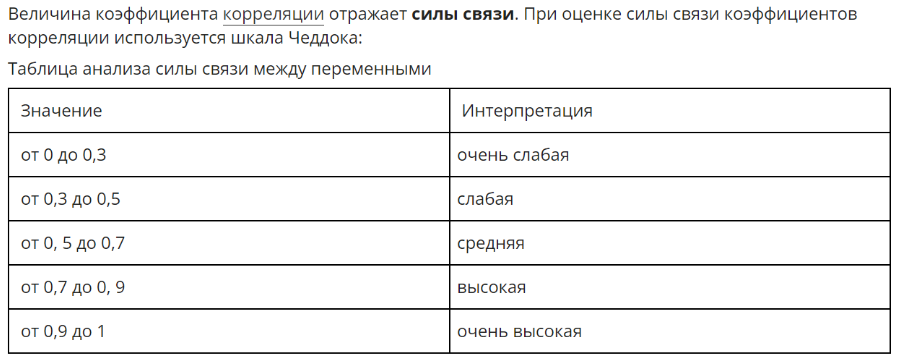

### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам. Определим и рассмотрим самые прибыльные жанры. Ответим на вопрос: выделяются ли жанры с высокими и низкими продажами?

Text(0, 0.5, 'Количество игр')

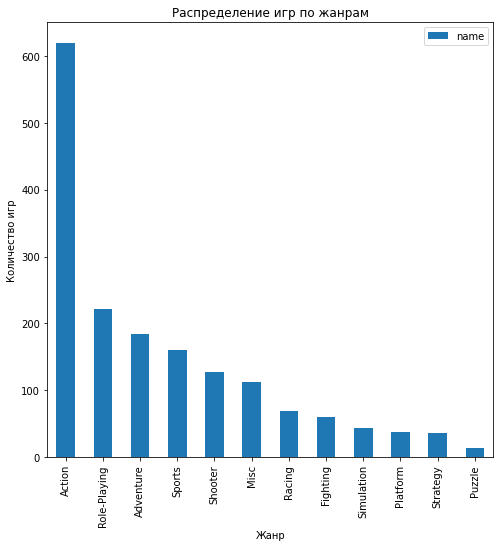

In [50]:
# Построим столбчатую диаграмму распределение игр по жанрам
(df_actual.groupby('genre').agg({'name': 'count'})
 .sort_values(by='name', ascending=False)
 .plot.bar(figsize=(8, 8))
)

plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')

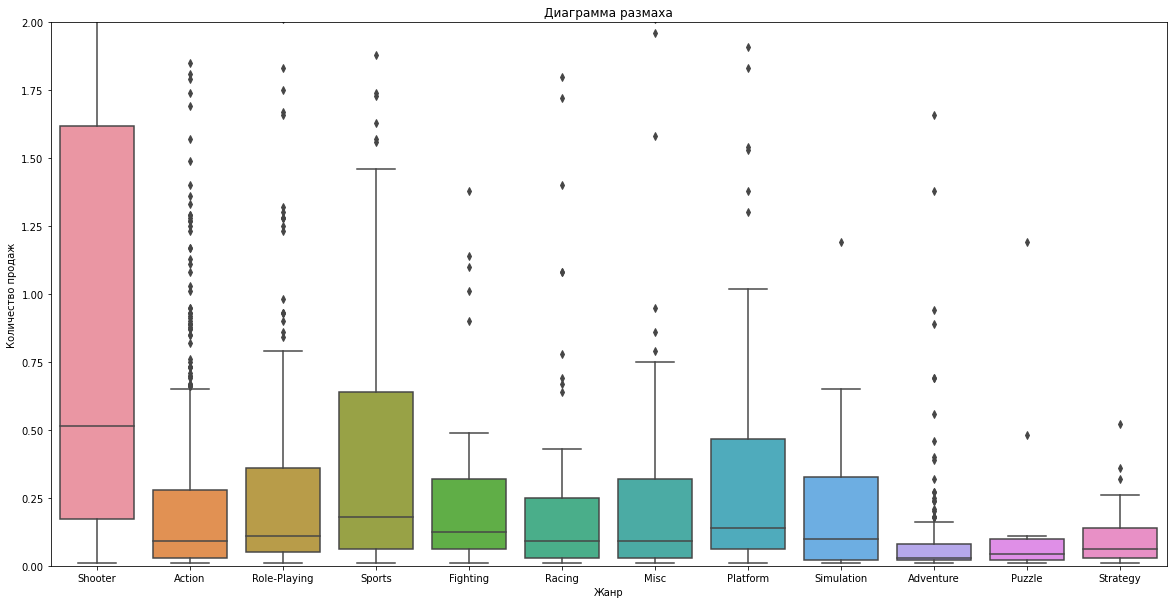

In [51]:
fig = plt.subplots(figsize=(20, 10))

# Строим "ящики с усами" для каждого жанра масштабированный
sns.boxplot(x='genre', y='total_sales', data=df_actual[['genre', 'total_sales']])
plt.ylim(0, 2)
plt.title('Диаграмма размаха')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.show()

Самым прибыльным жанром игр является Shooter. Он также входит в топ-5 популярных жанров. К нему относятся около 180 игр, а количество продаж в среднем составляет 0,5 миллионов копий. Следом за ним по количеству продаж идут - Sports и Platform, несмотря на то, что Platform относится к одним из невостребованных жанров. Sports также входит в топ-5 по популярности. А вот про Action, лидирующим в этом топе, в отличии от остальных уже перечисленных жанров, нельзя сказать, что он является продаваемым - скорее наоброт. 

## Портрет пользователя каждого региона

Составим портрет пользователя каждого региона. Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [52]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

### Топ-5 популярных платформ

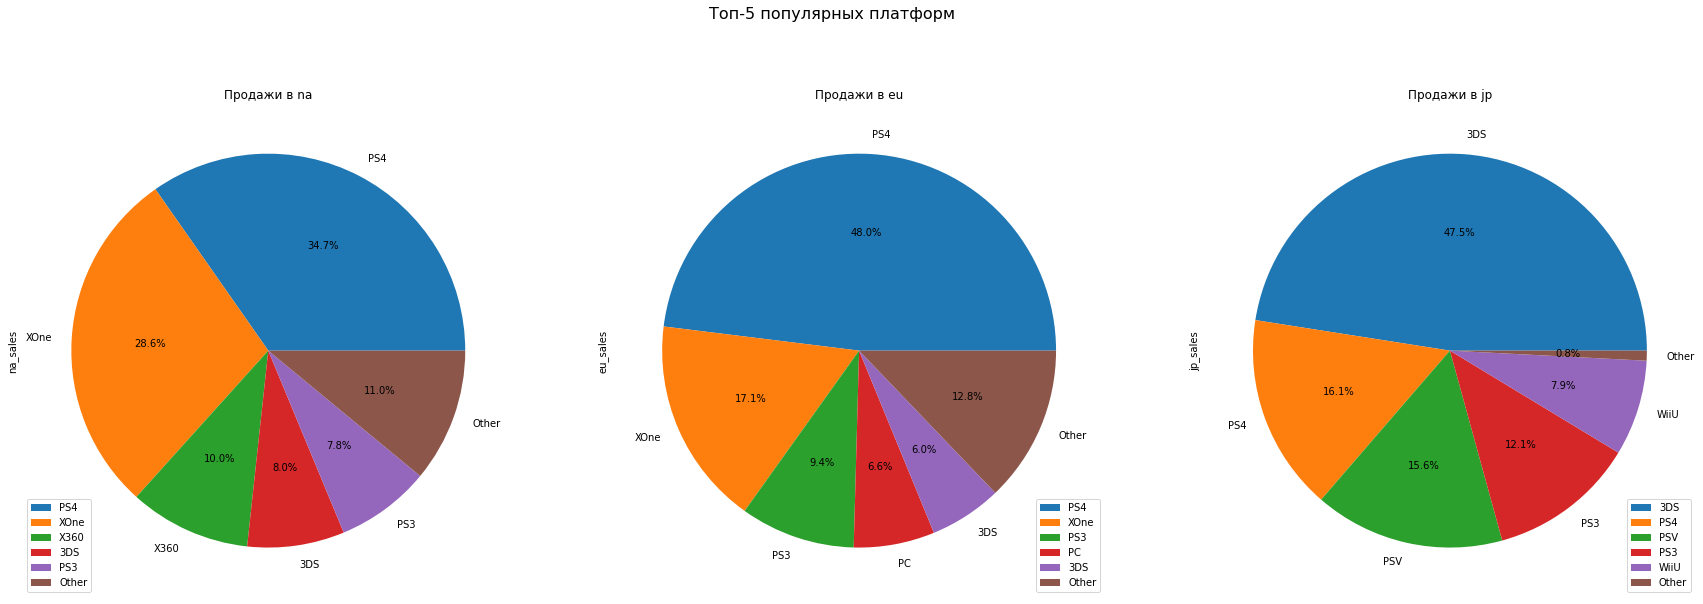

In [53]:
fig, axs = plt.subplots(1, len(regions), figsize=(30, 10))

for i, region in enumerate(regions):
    df_platform = df_actual.groupby('platform')[region].sum().reset_index().sort_values(by=region, ascending=False).reset_index(drop=True)
    df_platform.loc[5: , 'platform'] = 'Other'
    other_sales = df_platform.loc[df_platform['platform'] == 'Other', region].sum()
    df_platform = df_platform.drop_duplicates(subset='platform', keep='first')
    df_platform.loc[df_platform['platform'] == 'Other', region] = other_sales
    df_platform.plot.pie(y=region, labels=df_platform['platform'], autopct='%1.1f%%', ax=axs[i])
    axs[i].set_title(f'Продажи в {region[:2]}') 

fig.suptitle('Топ-5 популярных платформ', fontsize=16) # Общее название для всех диаграмм
plt.show()

Среди топов-5 всех регионов оказалась PS4. Она занимает лидирующую позицию сразу в двух регионах - в Европе и в Северной Америке. В этих же регионах второе место по количеству продаж занимает платформа XOne. В Японии свой фаворит - платформа 3DS, которая также входит в топ-5 Европы, на втором месте - PS4.

### Топ-5 популярных жанров

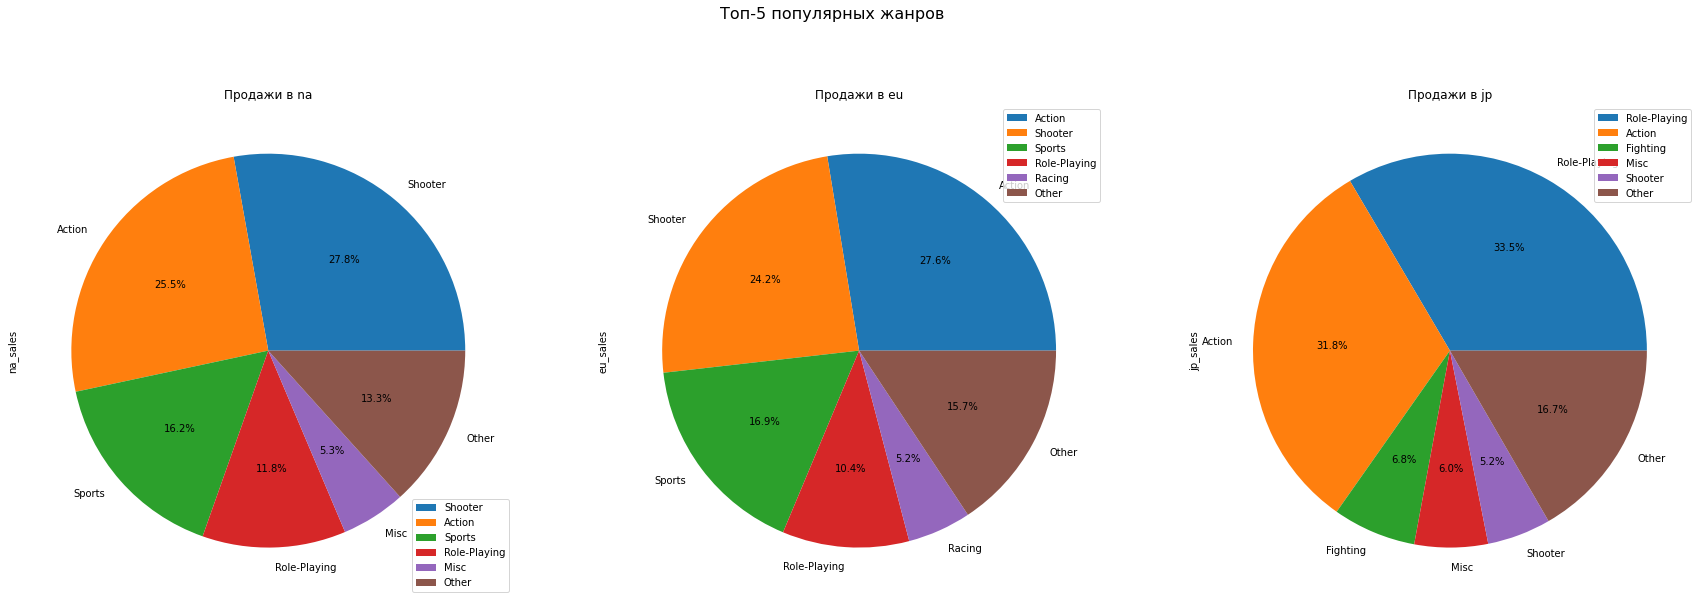

In [54]:
fig, axs = plt.subplots(1, len(regions), figsize=(30, 10))

for i, region in enumerate(regions):
    df_platform = df_actual.groupby('genre')[region].sum().reset_index().sort_values(by=region, ascending=False).reset_index(drop=True)
    df_platform.loc[5: , 'genre'] = 'Other'
    other_sales = df_platform.loc[df_platform['genre'] == 'Other', region].sum()
    df_platform = df_platform.drop_duplicates(subset='genre', keep='first')
    df_platform.loc[df_platform['genre'] == 'Other', region] = other_sales
    df_platform.plot.pie(y=region, labels=df_platform['genre'], autopct='%1.1f%%', ax=axs[i])
    axs[i].set_title(f'Продажи в {region[:2]}') 

fig.suptitle('Топ-5 популярных жанров', fontsize=16) # Общее название для всех диаграмм
plt.show()

По топам всех регионов можно выделить четыре самых продаваемых жанра игр - Action, Shooter, Sports, Role-Playing.

### Влияние рейтинга ESRB на продажи в отдельном регионе

Рейтинг ESRB предназначен для маркировки игр для США и Канады, входящих в состав Северной Америки. И логично, что для других регионов он не заполняется. Учтем это и рассмотрим влияние рейтинга ESRB на продажи в Северной Америке.

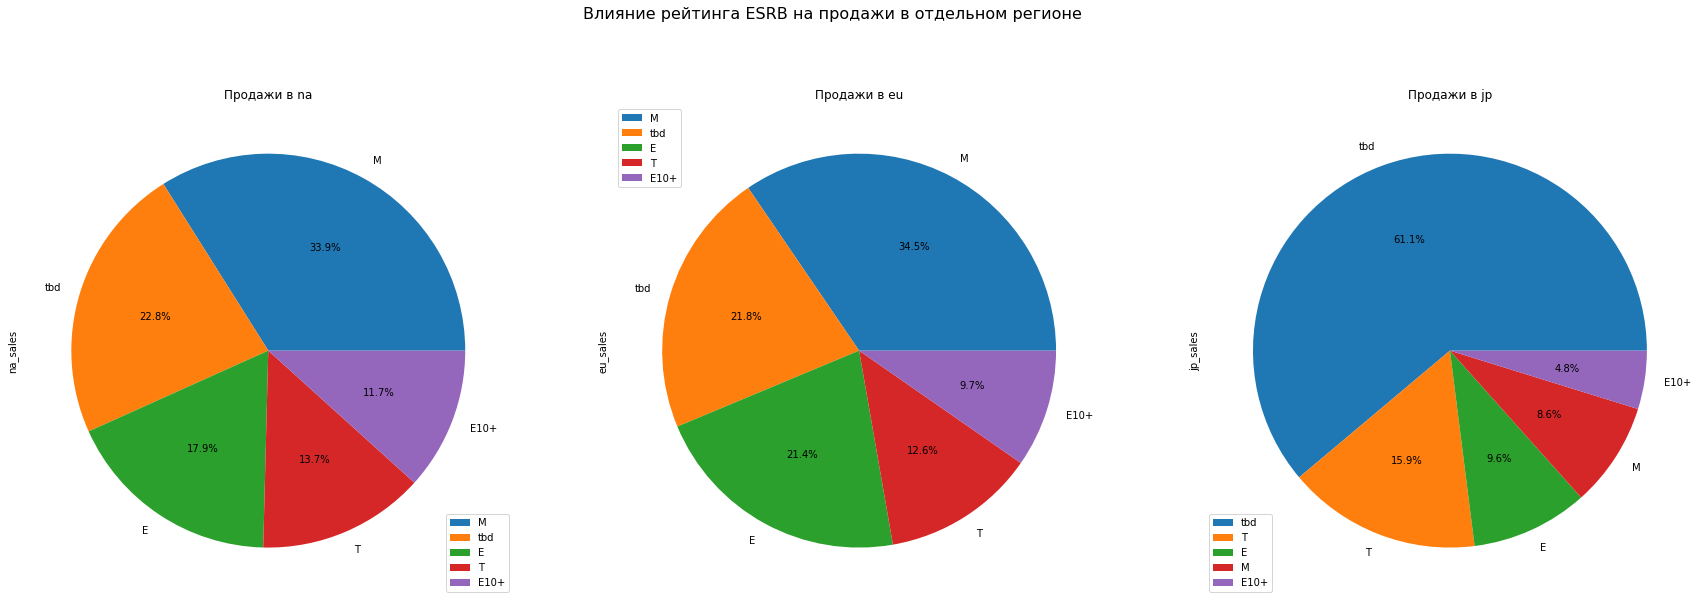

In [55]:
fig, axs = plt.subplots(1, len(regions), figsize=(30, 10))

for i, region in enumerate(regions):
    df_platform = df_actual.groupby('rating')[region].sum().reset_index().sort_values(by=region, ascending=False).reset_index(drop=True)
    df_platform.loc[5: , 'rating'] = 'Other'
    other_sales = df_platform.loc[df_platform['rating'] == 'Other', region].sum()
    df_platform = df_platform.drop_duplicates(subset='rating', keep='first')
    df_platform.loc[df_platform['rating'] == 'Other', region] = other_sales
    df_platform.plot.pie(y=region, labels=df_platform['rating'], autopct='%1.1f%%', ax=axs[i])
    axs[i].set_title(f'Продажи в {region[:2]}') 

fig.suptitle('Влияние рейтинга ESRB на продажи в отдельном регионе', fontsize=16) # Общее название для всех диаграмм
plt.show()

Самыми продаваемыми являются игры с рейтингом M и thb.

In [56]:
temp = df_actual.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts(dropna=False)

0 0.0


tbd     749
T       271
M       265
E       219
E10+    185
Name: rating, dtype: int64

## Проверка гипотез

Проверим гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Принцип формулировки нулевой и альтернативной гипотез заключается в определении двух взаимоисключающих утверждений, которые подлежат проверке при проведении статистического теста.

Нулевая гипотеза - это утверждение, которое предполагает равенство средних генеральных совокупностей. Она предполагает, что любые наблюдаемые различия случайны и не являются статистически значимыми.
Альтернативная гипотеза - это утверждение, которое противоположно нулевой гипотезе. Она выражает наше предположение о наличии разницы средних генеральных совокупностей. Если нулевая гипотеза отвергается, альтернативная гипотеза может быть принята как более вероятная.

После формулирования гипотезы выбирается статистический критерий, который будет использован для проверки гипотезы. В данном случае для проверки этих гипотез можно применить t-тест для независимых выборок, так как 
- Мы будем сравнивать средние двух разных групп (и для платформ, и для жанров). Генеральные совокупности не зависят друг от друга.
- Выборочные средние нормально распределены. Это условие не должно быть препятствием благодаря ЦПТ. Если размер выборки составляет хотя бы несколько десятков значений, то выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены близко к нормальному вокруг истинного среднего этой совокупности. Это так, даже если сама генеральная совокупность не распределена нормально.
- Дисперсии рассматриваемых генеральных совокупностей равны. 

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Необходимо проверить двухстороннюю гипотезу о равенстве средних двух генеральных совокупностей.

Нулевая гипотеза: cредний пользовательский рейтинг платформы Xbox One равен cреднему пользовательскому рейтингу платформы PC.

Альтернативая гипотеза: cредний пользовательский рейтинг платформы Xbox One не равен cреднему пользовательскому рейтингу платформы PC.

In [57]:
alpha = 0.05

results = st.ttest_ind(df_actual.loc[df_actual['platform'] == 'XOne', ['user_score']], 
                       df_actual.loc[df_actual['platform'] == 'PC', ['user_score']], 
                       equal_var=False, # дисперсии у генеральных совокупностей разные
                       nan_policy='omit')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')      

p-value: [0.11601398]
Нет оснований отвергнуть нулевую гипотезу


In [58]:
df_actual.loc[df_actual['platform'] == 'XOne', ['user_score']].mean() - df_actual.loc[df_actual['platform'] == 'PC', ['user_score']].mean()

user_score    0.296185
dtype: float64

Нет оснований отвергнуть гипотезу о том, что cредний пользовательский рейтинг платформы Xbox One равен cреднему пользовательскому рейтингу платформы PC.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Необходимо проверить двухстороннюю гипотезу о равенстве средних двух генеральных совокупностей.

Нулевая гипотеза: cредний пользовательский рейтинг жанра Action равен cреднему пользовательскому рейтингу жанра Sports.

Альтернативая гипотеза: cредний пользовательский рейтинг жанра Action не равен cреднему пользовательскому рейтингу жанра Sports. 

In [59]:
alpha = 0.05

results = st.ttest_ind(df_actual.loc[df_actual['genre'] == 'Action', ['user_score']], 
                       df_actual.loc[df_actual['genre'] == 'Sports', ['user_score']], 
                       equal_var=False, 
                       nan_policy='omit'
                      )

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')      

p-value: [1.18255504e-14]
Отвергаем нулевую гипотезу


In [60]:
df_actual.loc[df_actual['genre'] == 'Action', ['user_score']].mean() - df_actual.loc[df_actual['genre'] == 'Sports', ['user_score']].mean()

user_score    1.535409
dtype: float64

Отвергаем гипотезу о том, что cредний пользовательский рейтинг жанра Action равен cреднему пользовательскому рейтингу жанра Sports.

## Общий вывод

Перед нами стояла задача выявить определяющие успешность игры закономерности, позволяющие сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Нам были предоставлены данные до 2016 года, по которым нужно спрогнозировать кампанию на 2017-й. В ходе работы мы провели предобрабтку данных - проверили на наличие полных, явных и неявных дубликатов, устранили пропуски, названия столбцов были привели к нужному (нижнему) регистру и изменили тип данных в тех столбцах, где это было необходимо. Также мы провели исследовательский и статистический анализы полученых данных. По результатам проделанной работы были сделаны следующие выводы:

- Наибольшее количество игр было выпущено в период с 2008 по 2009 года. Затем количество релизов с каждым годом начало уменьшаться.
- Было обнаружено, что платформы, лидирующие по суммарными продажами, то есть наиболее успешные, существуют в течение 7 лет, а пик их прибыльности обычно приходится на 4-ый год их существования. Приняв во внимание этот фактор, мы выявили актуальный период для прогнозирования успешной кампании на 2017 год - это период с 2014 года по 2016 год. Далее были рассмотрены данные лишь за этот временной интервал, и, соответственно, все последующие выводы основаны на них. 
- Была изучена тенденция изменения продаж по платформам - какие платформы лидируют по продажам: растут или падают. В результате этого были установлены потенциально прибыльные платформы - PS4, XOne. Они выпускают игры-бестселлеры, которые способствуют увеличению количества продаж.
- На продажи игр внутри платформы отзывы критиков и отзывы пользователей оказывают очень слабое влияние.
- Самым прибыльным жанром игр является Shooter. Он также входит в топ-5 популярных жанров. К нему относятся около 180 игр, а количество продаж в среднем составляет 0,5 миллионов копий. Следом за ним по количеству продаж идут - Sports и Platform, несмотря на то, что Platform относится к одним из невостребованных жанров. Sports также входит в топ-5 по популярности. А вот про Action, лидирующим в этом топе, в отличии от остальных уже перечисленных жанров, нельзя сказать, что он является продаваемым - скорее наоброт.
- Были составлены портреты пользователей для каждого региона([Северная Америка](#na),  [Европа](#eu),  [Япония](#jp)), по итогу чего было установлены: топ-5 платформ для каждого региона, топ-5 жанров для каждого региона и влияние рейтинга ESRB на продажи в Северной Америке. Среди топов-5 всех регионов оказалась PS4. Она занимает лидирующую позицию сразу в двух регионах - в Европе и в Северной Америке. В этих же регионах второе место по количеству продаж занимает платформа XOne. В Японии свой фаворит - платформа 3DS, которая также входит в топ-5 Европы, на втором месте - PS4. По топам всех регионов можно выделить четыре самых продаваемых жанра игр - Action, Shooter, Sports, Role-Playing. Что касается рейтинга ESRB - самыми продаваемыми являются игры с рейтингом M и thb.

Также была реализована проверка двух гипотез с помощью статистического теста, по итогам которого были приняты или опровергнуты некоторые гипотезы:
- Нет оснований отвергнуть гипотезу о том, что cредний пользовательский рейтинг платформы Xbox One равен cреднему пользовательскому рейтингу платформы PC, в пользу гипотезы о том, что cредний пользовательский рейтинг платформы Xbox One не равен cреднему пользовательскому рейтингу платформы PC.
- Отвергаем гипотезу о том, что cредний пользовательский рейтинг жанра Action равен cреднему пользовательскому рейтингу жанра Sports, в пользу гипотезы о том, что cредний пользовательский рейтинг жанра Action не равен cреднему пользовательскому рейтингу жанра Sports.

По результатам проведенного анализа следует провести кампанию на 2017-й год, взяв во внимание следующие рекомендации: 
- следует сделать упор на продаже игр, относящихся к платформам PS4, в первую очередь, и XOne, так как было выяснено, что они являются потенциально прибыльными платформами, а также они распространены как минимум в двух из трех регионов и хотя бы в одном из них занимают лидирующие позиции по количеству продаж.
- также стоит взять во внимание такие жанры игр, как Shooter, Sport и Role-Playing - особенно Shooter и Role-Playing. Эти три жанра являются наиболее прибыльными и популярными во всех регионах.
- для избежания провала кампании следует рассматривать для продажи игры с рейтингом M.